In [1]:
!pip install patsy

In [2]:
!pip install statsmodels

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
from matplotlib import font_manager, rc

font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv("../MidProject/201807_userInfo.csv")
df.head()

,기준년월,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,이용거절여부_카드론,동의여부_한도증액안내,수신거부여부_TM,수신거부여부_DM,수신거부여부_메일,수신거부여부_SMS,가입통신회사코드,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,마케팅동의여부,유효카드수_신용체크,유효카드수_신용,유효카드수_신용_가족,유효카드수_체크,유효카드수_체크_가족,이용가능카드수_신용체크,이용가능카드수_신용,이용가능카드수_신용_가족,이용가능카드수_체크,이용가능카드수_체크_가족,이용카드수_신용체크,이용카드수_신용,이용카드수_신용_가족,이용카드수_체크,이용카드수_체크_가족,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,_2순위카드이용금액,_2순위카드이용건수,_2순위신용체크구분,최종유효년월_신용_이용가능,최종유효년월_신용_이용,최종카드발급일자,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용여부_3M_해외겸용_본인,보유여부_해외겸용_신용_본인,이용가능여부_해외겸용_신용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,SYN_0,2,40대,07,_,1,1,0,1,1,1,20130101,67,0,0,1,0,0,0,0,LGT,1,61,0,0,경기,경기,1,2,1,0,1,0,2,1,0,1,0,1,1,0,0,0,19612,19612,0,0,0,368148,26,신용,0,0,체크,202110.0,202112.0,20160912.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),22
1,201807,SYN_1,1,30대,_,1,1,1,1,1,1,1,20170801,12,0,0,0,0,0,0,0,KTF,1,98,0,0,서울,서울,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1347574,1347574,0,0,0,1332368,46,신용,0,0,NaN,202112.0,202204.0,20170122.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.자녀성장기(1),18
2,201807,SYN_2,2,40대,_,_,1,1,1,1,1,1,20180601,2,0,0,0,0,0,0,0,SKT,1,44,0,0,충남,충남,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,347736,347736,0,0,0,290113,5,신용,0,0,NaN,202302.0,202209.0,20180227.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.자녀성장기(1),5
3,201807,SYN_3,1,40대,_,_,1,1,1,1,2,2,20060301,149,0,0,0,1,1,0,0,SKT,0,0,0,0,충남,충남,1,2,2,0,0,0,2,2,0,0,0,2,2,0,0,0,35564,35564,0,0,0,11823,9,신용,107998,7,신용,201910.0,202001.0,20141231.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.자녀성장기(1),43
4,201807,SYN_4,2,40대,_,_,0,0,0,1,1,0,20120501,75,0,0,0,1,1,1,1,KTF,0,0,0,0,부산,부산,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,신용,0,0,NaN,NaN,NaN,20170206.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),17


In [6]:
df.describe()

,기준년월,남녀구분코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,이용거절여부_카드론,동의여부_한도증액안내,수신거부여부_TM,수신거부여부_DM,수신거부여부_메일,수신거부여부_SMS,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,마케팅동의여부,유효카드수_신용체크,유효카드수_신용,유효카드수_신용_가족,유효카드수_체크,유효카드수_체크_가족,이용가능카드수_신용체크,이용가능카드수_신용,이용가능카드수_신용_가족,이용가능카드수_체크,이용가능카드수_체크_가족,이용카드수_신용체크,이용카드수_신용,이용카드수_신용_가족,이용카드수_체크,이용카드수_체크_가족,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족,_1순위카드이용금액,_1순위카드이용건수,_2순위카드이용금액,_2순위카드이용건수,최종유효년월_신용_이용가능,최종유효년월_신용_이용,최종카드발급일자,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용여부_3M_해외겸용_본인,보유여부_해외겸용_신용_본인,이용가능여부_해외겸용_신용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,최종카드발급경과월
count,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,2.751786e+06,2.401023e+06,2.976880e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3.000000e+06,3.000000e+06,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3000000.0,3000000.0,3000000.0,3.000000e+06,3.000000e+06
mean,201807.0,1.475782e+00,9.568413e-01,8.874397e-01,6.121490e-01,9.923077e-01,1.251352e+00,1.156520e+00,2.012261e+07,7.123892e+01,2.086433e-02,1.948990e-01,9.771533e-02,3.545727e-01,3.064750e-01,3.107140e-01,3.697430e-01,5.096057e-01,2.636280e+01,3.844667e-02,6.441000e-02,8.113010e-01,2.078217e+00,1.510540e+00,3.539067e-02,5.676763e-01,8.333333e-06,1.953603e+00,1.389483e+00,3.517167e-02,5.641203e-01,3.666667e-06,1.339058e+00,1.177251e+00,3.214567e-02,1.618063e-01,0.0,1.760239e+06,1.601205e+06,2.603904e+04,1.590332e+05,0.0,1.187451e+06,4.093042e+01,3.161558e+05,1.394786e+01,2.021518e+05,2.021538e+05,2.016483e+07,7.887393e-01,7.577957e-01,6.193253e-01,6.905497e-01,6.398650e-01,5.652877e-01,1.143467e-02,0.0,7.165847e+01,1.780144e+02,0.0,1.916130e-01,7.165847e+01,1.778228e+02,0.0,0.0,0.0,0.0,1.552220e-01,1.936079e+01
std,0.0,4.994132e-01,2.032142e-01,3.160546e-01,4.872604e-01,8.736798e-02,5.470333e-01,6.127797e-01,6.044965e+04,7.237885e+01,1.429301e-01,3.961230e-01,2.969294e-01,4.783837e-01,4.610294e-01,4.627860e-01,4.827351e-01,6.655994e-01,3.730706e+01,1.922720e-01,2.454819e-01,3.912694e-01,1.200629e+00,8.257230e-01,2.216789e-01,8.079712e-01,2.886740e-03,1.221029e+00,8.709525e-01,2.210821e-01,8.051092e-01,1.914851e-03,9.526706e-01,8.502303e-01,2.118073e-01,3.753120e-01,0.0,2.364343e+06,2.249528e+06,1.644671e+05,7.014325e+05,0.0,1.506278e+06,5.173443e+01,7.156597e+05,2.866864e+01,1.150010e+02,1.074064e+02,1.150154e+04,4.082030e-01,4.284174e-01,4.855528e-01,4.622671e-01,4.800394e-01,4.957193e-01,1.063199e-01,0.0,8.632721e+02,4.112731e+03,0.0,1.343424e+02,8.632721e+02,4.106152e+03,0.0,0.0,0.0,0.0,3.621162e-01,1.345176e+01
min,201807.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.990110e+07,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-7.766850e+05,-8.513410e+05,0.000000e+00,0.000000e+00,0.0,-3.925250e+05,-2.000000e+00,-3.669070e+05,-1.000000e+00,2.018030e+05,2.018060e+05,2.013050e+07,0.000000e+00,0.000000e+00,0.000000e+0

# Columns drop
- 자료조사를 통해 drop 이유 보충 필요함

In [7]:
columns_to_drop = ['기준년월', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일',
                '수신거부여부_SMS', '가입통신회사코드', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용',
                '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용',
                '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용', '이용카드수_신용_가족',
                '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
                '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
                '최종유효년월_신용_이용가능', '최종카드발급일자', '보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용가능여부_해외겸용_신용_본인']


columns_drop_df = df.drop(columns=columns_to_drop)
columns_drop_df.head()

,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,이용카드수_신용체크,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,최종유효년월_신용_이용,이용여부_3M_해외겸용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,SYN_0,2,40대,07,_,1,1,0,1,1,1,20130101,67,0,1,61,0,0,경기,경기,1,368148,26,신용,202112.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),22
1,SYN_1,1,30대,_,1,1,1,1,1,1,1,20170801,12,0,1,98,0,0,서울,서울,1,1332368,46,신용,202204.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.자녀성장기(1),18
2,SYN_2,2,40대,_,_,1,1,1,1,1,1,20180601,2,0,1,44,0,0,충남,충남,1,290113,5,신용,202209.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.자녀성장기(1),5
3,SYN_3,1,40대,_,_,1,1,1,1,2,2,20060301,149,0,0,0,0,0,충남,충남,2,11823,9,신용,202001.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.자녀성장기(1),43
4,SYN_4,2,40대,_,_,0,0,0,1,1,0,20120501,75,0,0,0,0,0,부산,부산,0,0,-2,신용,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),17


In [8]:
columns_drop_df.isnull().sum()

발급회원번호                     0
남녀구분코드                     0
연령                         0
VIP등급코드                    0
최상위카드등급코드                  0
회원여부_이용가능                  0
회원여부_이용가능_CA               0
회원여부_이용가능_카드론              0
소지여부_신용                    0
소지카드수_유효_신용                0
소지카드수_이용가능_신용              0
입회일자_신용                    0
입회경과개월수_신용                 0
회원여부_연체                    0
탈회횟수_누적                    0
최종탈회후경과월                   0
탈회횟수_발급6개월이내               0
탈회횟수_발급1년이내                0
거주시도명                      0
직장시도명                 304646
이용카드수_신용체크                 0
_1순위카드이용금액                 0
_1순위카드이용건수                 0
_1순위신용체크구분             16363
최종유효년월_신용_이용          598977
이용여부_3M_해외겸용_본인            0
이용여부_3M_해외겸용_신용_본인         0
연회비발생카드수_B0M               0
연회비할인카드수_B0M               0
기본연회비_B0M                  0
제휴연회비_B0M                  0
할인금액_기본연회비_B0M             0
할인금액_제휴연회비_B0M             0
청구금액_기본연회비_B0M             0
청구금액_제휴연회비_B0M

In [9]:
columns_drop_df.describe()

,남녀구분코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,이용카드수_신용체크,_1순위카드이용금액,_1순위카드이용건수,최종유효년월_신용_이용,이용여부_3M_해외겸용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,최종카드발급경과월
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,2.401023e+06,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3.000000e+06,3.000000e+06,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3000000.0,3000000.0,3000000.0,3.000000e+06,3.000000e+06
mean,1.475782e+00,9.568413e-01,8.874397e-01,6.121490e-01,9.923077e-01,1.251352e+00,1.156520e+00,2.012261e+07,7.123892e+01,2.086433e-02,5.096057e-01,2.636280e+01,3.844667e-02,6.441000e-02,1.339058e+00,1.187451e+06,4.093042e+01,2.021538e+05,6.193253e-01,5.652877e-01,1.143467e-02,0.0,7.165847e+01,1.780144e+02,0.0,1.916130e-01,7.165847e+01,1.778228e+02,0.0,0.0,0.0,0.0,1.552220e-01,1.936079e+01
std,4.994132e-01,2.032142e-01,3.160546e-01,4.872604e-01,8.736798e-02,5.470333e-01,6.127797e-01,6.044965e+04,7.237885e+01,1.429301e-01,6.655994e-01,3.730706e+01,1.922720e-01,2.454819e-01,9.526706e-01,1.506278e+06,5.173443e+01,1.074064e+02,4.855528e-01,4.957193e-01,1.063199e-01,0.0,8.632721e+02,4.112731e+03,0.0,1.343424e+02,8.632721e+02,4.106152e+03,0.0,0.0,0.0,0.0,3.621162e-01,1.345176e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.990110e+07,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.925250e+05,-2.000000e+00,2.018060e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.010030e+07,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.673175e+04,2.000000e+00,2.021040e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,9.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.014070e+07,4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.558000e+05,1.800000e+01,2.022030e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,1.700000e+01
75%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.017060e+07,1.010000e+02,0.000000e+00,1.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.732136e+06,6.400000e+01,2.022100e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,2.800000e+01
max,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,3.000000e+00,2.018060e+07,3.330000e+02,1.000000e+00,2.000000e+00,1.140000e+02,1.000000e+00,1.000000e+00,6.000000e+00,1.190021e+07,2.250000e+02,2.023120e+05,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.113600e+04,1.899840e+05,0.0,9.498500e+04,1.113600e+04,9.503700e+04,0.0,0.0,0.0,0.0,1.000000e+00,6.200000e+01


In [10]:
des_zero_columns = ['연회비할인카드수_B0M', '할인금액_기본연회비_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M']

des_zero_drop_df = columns_drop_df.drop(columns=des_zero_columns)
des_zero_drop_df.head()

,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,이용카드수_신용체크,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,최종유효년월_신용_이용,이용여부_3M_해외겸용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,SYN_0,2,40대,07,_,1,1,0,1,1,1,20130101,67,0,1,61,0,0,경기,경기,1,368148,26,신용,202112.0,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),22
1,SYN_1,1,30대,_,1,1,1,1,1,1,1,20170801,12,0,1,98,0,0,서울,서울,1,1332368,46,신용,202204.0,0,0,0,0,0,0,0,0,0,4.자녀성장기(1),18
2,SYN_2,2,40대,_,_,1,1,1,1,1,1,20180601,2,0,1,44,0,0,충남,충남,1,290113,5,신용,202209.0,0,0,0,0,0,0,0,0,1,4.자녀성장기(1),5
3,SYN_3,1,40대,_,_,1,1,1,1,2,2,20060301,149,0,0,0,0,0,충남,충남,2,11823,9,신용,202001.0,1,1,0,0,0,0,0,0,0,4.자녀성장기(1),43
4,SYN_4,2,40대,_,_,0,0,0,1,1,0,20120501,75,0,0,0,0,0,부산,부산,0,0,-2,신용,NaN,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),17


# 데이터 형 변환

In [11]:
data_format_ch_df = des_zero_drop_df
data_format_ch_df['발급회원번호'] = data_format_ch_df.index
data_format_ch_df['연령'] = data_format_ch_df['연령'].str.replace(r'\D','', regex=True).astype(int)
data_format_ch_df.head()

,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,이용카드수_신용체크,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,최종유효년월_신용_이용,이용여부_3M_해외겸용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,0,2,40,07,_,1,1,0,1,1,1,20130101,67,0,1,61,0,0,경기,경기,1,368148,26,신용,202112.0,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),22
1,1,1,30,_,1,1,1,1,1,1,1,20170801,12,0,1,98,0,0,서울,서울,1,1332368,46,신용,202204.0,0,0,0,0,0,0,0,0,0,4.자녀성장기(1),18
2,2,2,40,_,_,1,1,1,1,1,1,20180601,2,0,1,44,0,0,충남,충남,1,290113,5,신용,202209.0,0,0,0,0,0,0,0,0,1,4.자녀성장기(1),5
3,3,1,40,_,_,1,1,1,1,2,2,20060301,149,0,0,0,0,0,충남,충남,2,11823,9,신용,202001.0,1,1,0,0,0,0,0,0,0,4.자녀성장기(1),43
4,4,2,40,_,_,0,0,0,1,1,0,20120501,75,0,0,0,0,0,부산,부산,0,0,-2,신용,NaN,0,0,0,0,0,0,0,0,0,5.자녀성장기(2),17


## 'VIP등급코드' mapping
- 04 : VIP_4등급 -> 4
- 05 : VIP_3등급 -> 5
- 06 : VIP_2등급 -> 6
- 07 : VIP_1등급 -> 7
- _ : 일반등급 -> 8

"01-03" : VVIP   
"04-10" : VIP (코드 숫자가 작을수록 높은 등급)   
"_" : 일반등급

In [12]:
vip_mapping = {
    '04': 4, '05': 5, '06': 6, '07': 7, '_': 8 
}

data_format_ch_df['VIP등급코드'] = data_format_ch_df['VIP등급코드'].map(vip_mapping)
data_format_ch_df['VIP등급코드'].head()

0    7
1    8
2    8
3    8
4    8
Name: VIP등급코드, dtype: int64

## '최상위카드등급코드' mapping
- 4 : 4등급
- 3 : 3등급
- 2 : 2등급
- 1 : 1등급
- _ : 등급없음 -> 5


"01-03" : VVIP   
"04-10" : VIP (코드 숫자가 작을수록 높은 등급)   
"_" : 일반등급

In [13]:
top_mapping = {
    '_': 5, '4': 4, '3': 3, '2': 2, '1': 1
}

data_format_ch_df['최상위카드등급코드'] = data_format_ch_df['최상위카드등급코드'].map(top_mapping)
data_format_ch_df['최상위카드등급코드'].head()

0    5
1    1
2    5
3    5
4    5
Name: 최상위카드등급코드, dtype: int64

## '거주시도명' mapping

In [14]:
live_mapping = {
    '경기': 0, '서울': 1, '인천': 2, '부산': 3, '대전': 4, '충남': 5, '경남': 6, '경북': 7, '대구': 8,
    '울산': 9, '전북': 10, '광주': 11, '충북': 12, '강원': 13, '전남': 14, '제주': 15, '세종': 16
}

data_format_ch_df['거주시도명'] = data_format_ch_df['거주시도명'].map(live_mapping)
data_format_ch_df['거주시도명'].head()

0    0
1    1
2    5
3    5
4    3
Name: 거주시도명, dtype: int64

## '직장시도명' mapping

In [15]:
data_format_ch_df['직장시도명'] = data_format_ch_df['직장시도명'].fillna('없음') # NaN값 채움

job_mapping = {
    '경기': 0, '서울': 1, '인천': 2, '부산': 3, '대전': 4, '충남': 5, '경남': 6, '경북': 7, '대구': 8,
    '울산': 9, '전북': 10, '광주': 11, '충북': 12, '강원': 13, '전남': 14, '제주': 15, '세종': 16, '없음': 17
}

data_format_ch_df['직장시도명'] = data_format_ch_df['직장시도명'].map(job_mapping)
data_format_ch_df['직장시도명'].head()

0    0
1    1
2    5
3    5
4    3
Name: 직장시도명, dtype: int64

## '_1순위신용체크구분' mapping

In [16]:
data_format_ch_df['_1순위신용체크구분'] = data_format_ch_df['_1순위신용체크구분'].fillna('구분없음') # NaN값 채움

card_mapping = {
    '구분없음': 0, '신용': 1, '체크': 2
}

data_format_ch_df['_1순위신용체크구분'] = data_format_ch_df['_1순위신용체크구분'].map(card_mapping)
data_format_ch_df['_1순위신용체크구분'].head()

0    1
1    1
2    1
3    1
4    1
Name: _1순위신용체크구분, dtype: int64

## 'Life_Stage' mapping

In [17]:
life_mapping = {
    '1.Single': 1, '2.가족형성기': 2, '3.자녀출산기': 3, '4.자녀성장기(1)': 4, '5.자녀성장기(2)': 5, '6.자녀출가기': 6, '7.노령': 7
}

data_format_ch_df['Life_Stage'] = data_format_ch_df['Life_Stage'].map(life_mapping)
data_format_ch_df['Life_Stage'].head()

0    5
1    4
2    4
3    4
4    5
Name: Life_Stage, dtype: int64

In [31]:
data_format_ch_df['입회일자_신용'] = pd.to_datetime(data_format_ch_df['입회일자_신용'].astype(str), format='%Y%m%d')

# 상관관계 분석

In [32]:
data_format_ch_df.head()

,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,이용카드수_신용체크,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,이용여부_3M_해외겸용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,0,2,40,7,5,1,1,0,1,1,1,2013-01-01,67,0,1,61,0,0,0,0,1,368148,26,1,0,0,0,0,0,0,0,0,0,5,22
1,1,1,30,8,1,1,1,1,1,1,1,2017-08-01,12,0,1,98,0,0,1,1,1,1332368,46,1,0,0,0,0,0,0,0,0,0,4,18
2,2,2,40,8,5,1,1,1,1,1,1,2018-06-01,2,0,1,44,0,0,5,5,1,290113,5,1,0,0,0,0,0,0,0,0,1,4,5
3,3,1,40,8,5,1,1,1,1,2,2,2006-03-01,149,0,0,0,0,0,5,5,2,11823,9,1,1,1,0,0,0,0,0,0,0,4,43
4,4,2,40,8,5,0,0,0,1,1,0,2012-05-01,75,0,0,0,0,0,3,3,0,0,-2,1,0,0,0,0,0,0,0,0,0,5,17


## 결측치 처리

In [19]:
data_format_ch_df.isnull().sum()

발급회원번호                     0
남녀구분코드                     0
연령                         0
VIP등급코드                    0
최상위카드등급코드                  0
회원여부_이용가능                  0
회원여부_이용가능_CA               0
회원여부_이용가능_카드론              0
소지여부_신용                    0
소지카드수_유효_신용                0
소지카드수_이용가능_신용              0
입회일자_신용                    0
입회경과개월수_신용                 0
회원여부_연체                    0
탈회횟수_누적                    0
최종탈회후경과월                   0
탈회횟수_발급6개월이내               0
탈회횟수_발급1년이내                0
거주시도명                      0
직장시도명                      0
이용카드수_신용체크                 0
_1순위카드이용금액                 0
_1순위카드이용건수                 0
_1순위신용체크구분                 0
최종유효년월_신용_이용          598977
이용여부_3M_해외겸용_본인            0
이용여부_3M_해외겸용_신용_본인         0
연회비발생카드수_B0M               0
기본연회비_B0M                  0
제휴연회비_B0M                  0
할인금액_제휴연회비_B0M             0
청구금액_기본연회비_B0M             0
청구금액_제휴연회비_B0M             0
카드신청건수                     0
Life_Stage    

In [28]:
pd.set_option('float_format', '{:.2f}'.format)
# data_format_ch_df = data_format_ch_df.drop(columns='최종유효년월_신용_이용')
data_format_ch_df.describe()

,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,이용카드수_신용체크,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,이용여부_3M_해외겸용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월
count,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00
mean,1499999.50,1.48,41.39,7.75,4.19,0.96,0.89,0.61,0.99,1.25,1.16,20122605.07,71.24,0.02,0.51,26.36,0.04,0.06,2.83,4.48,1.34,1187451.09,40.93,1.03,0.62,0.57,0.01,71.66,178.01,0.19,71.66,177.82,0.16,4.28,19.36
std,866025.55,0.50,12.34,0.55,1.46,0.20,0.32,0.49,0.09,0.55,0.61,60449.65,72.38,0.14,0.67,37.31,0.19,0.25,3.40,5.43,0.95,1506278.28,51.73,0.19,0.49,0.50,0.11,863.27,4112.73,134.34,863.27,4106.15,0.36,1.50,13.45
min,0.00,1.00,20.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,19901101.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-392525.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,749999.75,1.00,30.00,8.00,4.00,1.00,1.00,0.00,1.00,1.00,1.00,20100301.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,26731.75,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9.00
50%,1499999.50,1.00,40.00,8.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,20140701.00,49.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,655800.00,18.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,17.00
75%,2249999.25,2.00,50.00,8.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,20170601.00,101.00,0.00,1.00,45.00,0.00,0.00,4.00,7.00,2.00,1732136.25,64.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,28.00
max,2999999.00,2.00,70.00,8.00,5.00,1.00,1.00,1.00,1.00,4.00,3.00,20180601.00,333.00,1.00,2.00,114.00,1.00,1.00,16.00,17.00,6.00,11900206.00,225.00,2.00,1.00,1.00,1.00,11136.00,189984.00,94985.00,11136.00,95037.00,1.00,7.00,62.00


In [33]:
percent = [0.20, 0.40, 0.60, 0.80]
data_format_ch_df.describe(percentiles=percent)

,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,이용카드수_신용체크,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,이용여부_3M_해외겸용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월
count,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00
mean,1499999.50,1.48,41.39,7.75,4.19,0.96,0.89,0.61,0.99,1.25,1.16,2012-08-23 20:59:21.321599232,71.24,0.02,0.51,26.36,0.04,0.06,2.83,4.48,1.34,1187451.09,40.93,1.03,0.62,0.57,0.01,71.66,178.01,0.19,71.66,177.82,0.16,4.28,19.36
min,0.00,1.00,20.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1990-11-01 00:00:00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-392525.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
20%,599999.80,1.00,30.00,8.00,3.00,1.00,1.00,0.00,1.00,1.00,1.00,2008-05-01 00:00:00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.00
40%,1199999.60,1.00,40.00,8.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,2013-03-01 00:00:00,33.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,351848.20,9.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,14.00
50%,1499999.50,1.00,40.00,8.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,2014-07-01 00:00:00,49.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,655800.00,18.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,17.00
60%,1799999.40,2.00,40.00,8.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,2015-11-01 00:00:00,65.00,0.00,1.00,18.00,0.00,0.00,2.00,3.00,1.00,1064809.40,32.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,21.00
80%,2399999.20,2.00,50.00,8.00,5.00,1.00,1.00,1.00,1.00,2.00,1.00,2017-11-01 00:00:00,123.00,0.00,1.00,46.00,0.00,0.00,6.00,8.00,2.00,2010368.20,79.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,32.00
max,2999999.00,2.00,70.00,8.00,5.00,1.00,1.00,1.00,1.00,4.00,3.00,2018-06-01 00:00:00,333.00,1.00,2.00,114.00,1.00,1.00,16.00,17.00,6.00,11900206.00,225.00,2.00,1.00,1.00,1.00,11136.00,189984.00,94985.00,11136.00,95037.00,1.00,7.00,62.00
std,866025.55,0.50,12.34,0.55,1.46,0.20,0.32,0.49,0.09,0.55,0.61,NaN,72.38,0.14,0.67,37.31,0.19,0.25,3.40,5.43,0.95,1506278.28,51.73,0.19,0.49,0.50,0.11,863.27,4112.73,134.34,863.27,4106.15,0.36,1.50,13.45


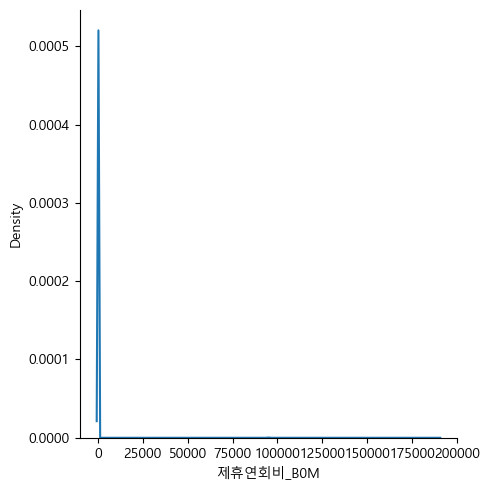

In [34]:
sns.displot(data=data_format_ch_df, x='제휴연회비_B0M', kind='kde')

In [20]:
# 선형 상관계수
correlation_matrix = data_format_ch_df.corr(method='pearson')
print(correlation_matrix)

                      발급회원번호    남녀구분코드        연령   VIP등급코드  최상위카드등급코드  \
발급회원번호              1.000000  0.000218 -0.000715  0.000092  -0.000129   
남녀구분코드              0.000218  1.000000 -0.013491  0.058590  -0.021483   
연령                 -0.000715 -0.013491  1.000000  0.031214   0.031847   
VIP등급코드             0.000092  0.058590  0.031214  1.000000  -0.210243   
최상위카드등급코드          -0.000129 -0.021483  0.031847 -0.210243   1.000000   
회원여부_이용가능          -0.000444  0.012252 -0.019049 -0.079523   0.002548   
회원여부_이용가능_CA       -0.000560  0.003581  0.020564 -0.083892  -0.026785   
회원여부_이용가능_카드론      -0.000562 -0.013775  0.094297  0.009765   0.029369   
소지여부_신용            -0.000747 -0.007337  0.003371 -0.037553  -0.048567   
소지카드수_유효_신용        -0.000230 -0.094620 -0.035428 -0.332414   0.152393   
소지카드수_이용가능_신용      -0.000419 -0.068168 -0.017458 -0.320190   0.127900   
입회일자_신용            -0.000168  0.058095 -0.286107  0.256211  -0.453968   
입회경과개월수_신용          0.000152 -0.058152  0.286399 -0

In [35]:
data_format_ch_df.to_csv("userInfo_EDA.csv")